# Pipeline for analysis

## Pre processing raw data

Importing the appropiate directories

In [ ]:
from DE import networkAnalysis as na

clusterDirectory need to point towards directory in which all the clusters can be found. 
It will then loop through all of the data files, gathering the sample ids from all cluster and create individual .csv files for analysis in R

In [ ]:
csvpath = "//home/jacob/examensarbete/test.csv"
obj = na()
obj.readCsv(csvpath)
obj.renameCol('Unnamed: 0', 'gene_id')

In [ ]:
obj.medlog2(1)

In [ ]:
bottom = 0.5
top = 1
obj.filterVariantGenes(bottom, top)

In [ ]:
obj.toCsv('/home/jacob/examensarbete/software/data/test_var({}).txt'.format(bottom*100), '\t')

## Running SRIQ

In [ ]:
from runSRIQ import runSRIQ as rs
import numpy

In [ ]:
# data = 'test_var({})'.format(variance*100)
data = 'test_mc_log2var(80)'
# cutOff = [round(x, 2) for x in numpy.arange(0.4,0.9, 0.02)]
cutOff = [0.9,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80,0.79,0.78,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.7,0.69,0.68,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.6,0.59,0.58,0.57,0.56,0.55,0.54,0.53,0.52,0.51,0.5,0.49,0.48,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.32,0.31,0.3,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.22,0.21,0.2,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.0]

In [ ]:
rs(data, cutOff)

In [ ]:
from IPython.display import Image

path = '/home/jacob/examensarbete/software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/VRLA_test_10000_Clusters_Frequencies.png'
Image(filename=path)

## Overview of the output

In [ ]:
from DE import networkAnalysis as na
csvpath = '/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt'
clusterpath = '/home/jacob/examensarbete/software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/dist(0.76)/3'
cutoffs = {0.49:[6], 0.42:[4]}
demo = na()
demo.demoRun(cutoffs, csvpath,clusterpath, columnname = 'Gene')

## Visualizing SRIQ output

Creates the object from the SRIQ output

/home/jacob/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


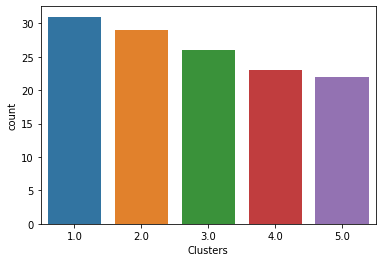

In [1]:
from DE import networkAnalysis as na
import pandas as np
import seaborn as sns
csvpath = '/home/jacob/examensarbete/software/data/test_mc_log2var(80).txt'
# cp = '/home/jacob/examensarbete/software/output/allt/sparad/10000/QC_Spiral(false)/dist(0.43)/4'
cp = '/home/jacob/examensarbete/software/output/VRLA_test_10000itr_1200var_10r/10000/QC_Spiral(false)/dist(0.48)/5'
test = na()

test.readSRIQ(csvpath, cp, columnname = 'Gene')

Plots the metagenes in an boxplot

In [36]:
test.boxDf['Cluster'] = ['Other' if x != 2 else 'Cluster 4' for x in test.boxDf['Cluster'].tolist()]

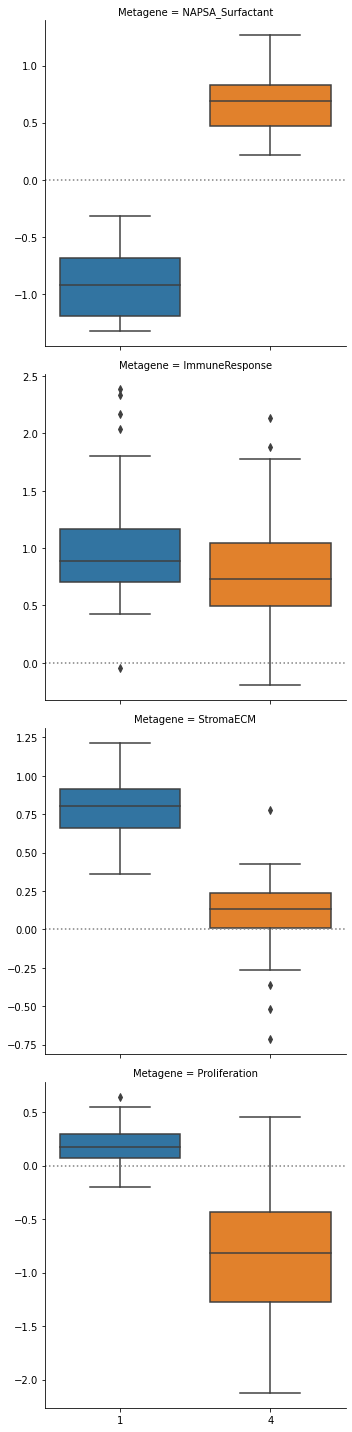

In [10]:
import matplotlib.pyplot as plt
test.boxDf = test.boxDf[test.boxDf['Metagene'] != 'BasalSquamous']
test.boxDf = test.boxDf[test.boxDf['Metagene'] != 'NeuroDevelopment']

grid = sns.catplot(kind = 'box', data = test.boxDf, x = 'Cluster', y = 'Values', col = 'Metagene', col_wrap = 1, sharey = False)
grid.map(plt.axhline, y=0, ls=":", c=".5")

In [8]:
test.boxDf = test.boxDf[test.boxDf['Cluster'].isin([1, 4])]

This may produce duplicate indexes which will be removed, keeping the first occurence
BasalSquamous
NAPSA_Surfactant
NeuroDevelopment
ImmuneResponse
StromaECM
Proliferation


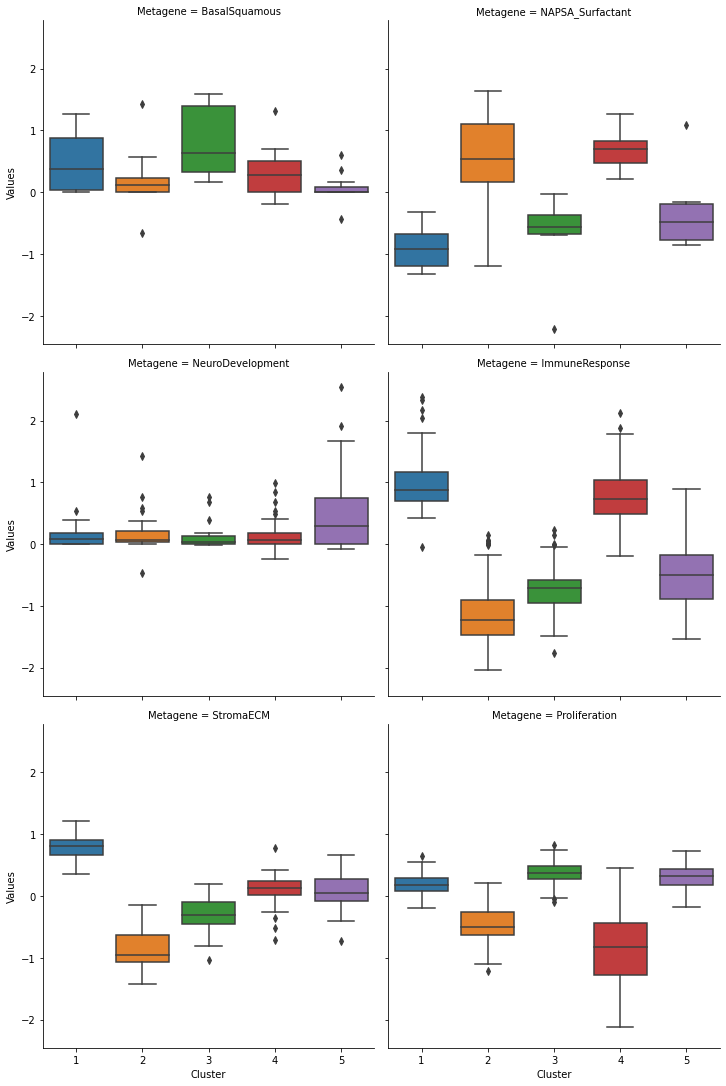

In [3]:
test.metaGenes()

In [ ]:
from scipy import stats
for meta in test.boxDf['Metagene'].unique().tolist():
    
    df = test.boxDf[test.boxDf['Metagene'] == meta]
    values, clusters = df['Values'].tolist(), df['Cluster'].unique().tolist()
    lista = [[val for val in values if val in df[df['Cluster'] == i]['Values'].tolist()] for i in clusters]
    print(meta, stats.kruskal(*lista)[1])


Barplot of the p values from normality test of the genes

In [ ]:
test.normalityTest()

Creates a pca model and displays it screeplot

In [ ]:
test.screePlot()

In [ ]:
test.pcaPlot()

Performing Uniform Manifold Approximation and Projection (UMAP) ...


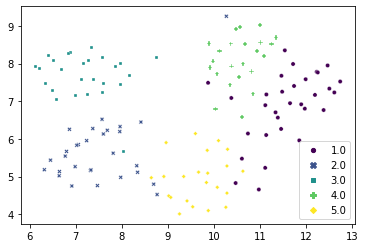

In [14]:
test.Umap(2)

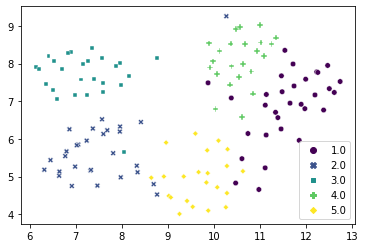

In [25]:
import seaborn as sns
Y = test.tDf.values[:,test.tDf.shape[1]-1]


sns.scatterplot(x=test.umap[:,0], y=test.umap[:,1], palette = 'viridis', s = 30, style = Y, hue = Y)

Calculates the centroids for each sample. Distribution plot will be shown, and when plotting the genexpression as labels for the samples

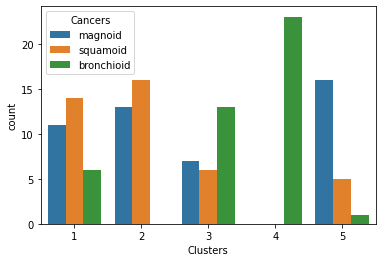

In [26]:
test.centroids(method = 'pearson')

In [27]:
bronchs = test.col_colors[test.col_colors['Centroid'] == 'Red'].index.to_list()
test.df = test.df[bronchs]
test.filterDf = test.df
test.symbolDf = test.symbolDf[bronchs]
test.sortedClusters = [[x for x in lista if x in bronchs] for lista in test.sortedClusters]
test.sortedClusters = [lista for lista in test.sortedClusters if lista != []]
test.tDf = test.tDf.filter(items = bronchs, axis = 'index')
nList = [[],[]]
[[nList[0].append(x) if counter != 2 else nList[1].append(x) for x in lista] for counter, lista in enumerate(test.sortedClusters)]
test.sortedClusters = nList
nList = list()
[[nList.append(x) for x in lista] for lista in test.sortedClusters]
f = lambda l: ['-'.join(s.split('-')[0:3]) for s in l]
test.samples = f(nList)
test.symbolDf = test.symbolDf[bronchs]

Filter variance, both bottom and top can be filtered.

In [2]:
bottom = 0.7
top = 0.95
test.filterVariantGenes(top = top, bottom = bottom)
#test.log2filterin()

Performs desired test for differential gene expression analysis.

In [3]:
test.diffGeneAnalysis(test = 'mannwhitneyu')



Performing FDR correction
Filtering out genes


Filter the significant genes based of desired filteringtype.

In [4]:
test.filtering(filteringType = 'log2fold', threshold = 2)

Cluster 1 54
Cluster 2 37
Cluster 3 16
Cluster 4 110
Cluster 5 75


### Add features from data folder

In [ ]:
import pandas as pd
if isinstance(test.col_colors, pd.DataFrame): test.col_colors = test.col_colors['Clusters']

test.addFeature(feature = 'tobacco_smoking_history', attr = 'Lifelong Non-smoker', censor='[Not Available]', title = 'Never-smokers')
# test.addFeature(feature = 'gender', attr = 'MALE', title = 'Males')
# test.addFeature(feature = 'gender', attr = 'FEMALE', title = 'Females')
# test.addFeature(feature = 'egfr_mutation_result', attr = 'ab', title = 'EGFR Mutation', censor='[Not Available]')
# test.addFeature(feature = 'kras_mutation_found', attr = 'YES', title = 'Kras Mutation', censor='[Not Available]')



Plots a clustermap of the result

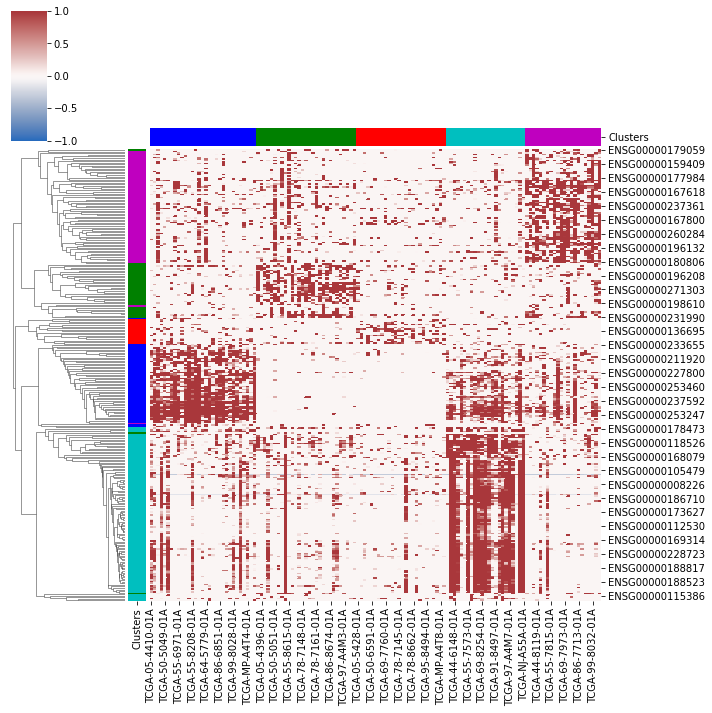

In [5]:
test.clusterMap(vmin = -1, vmax = 1, row_cluster= True)

Kaplan meier plot

In [ ]:
test.kaplanMeier()

## Enrichment analysis

Converts the enrichment list to symbols if in ensembleIDs

In [6]:
test.ensemble2gene()

Fetches the most significant dbs for each cluster and saves them into a list called dbs

Running for cluster 1
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 2
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 3
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 4
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018
Running for cluster 5
GO_Biological_Process_2018
GO_Cellular_Component_2018
GO_Molecular_Function_2018


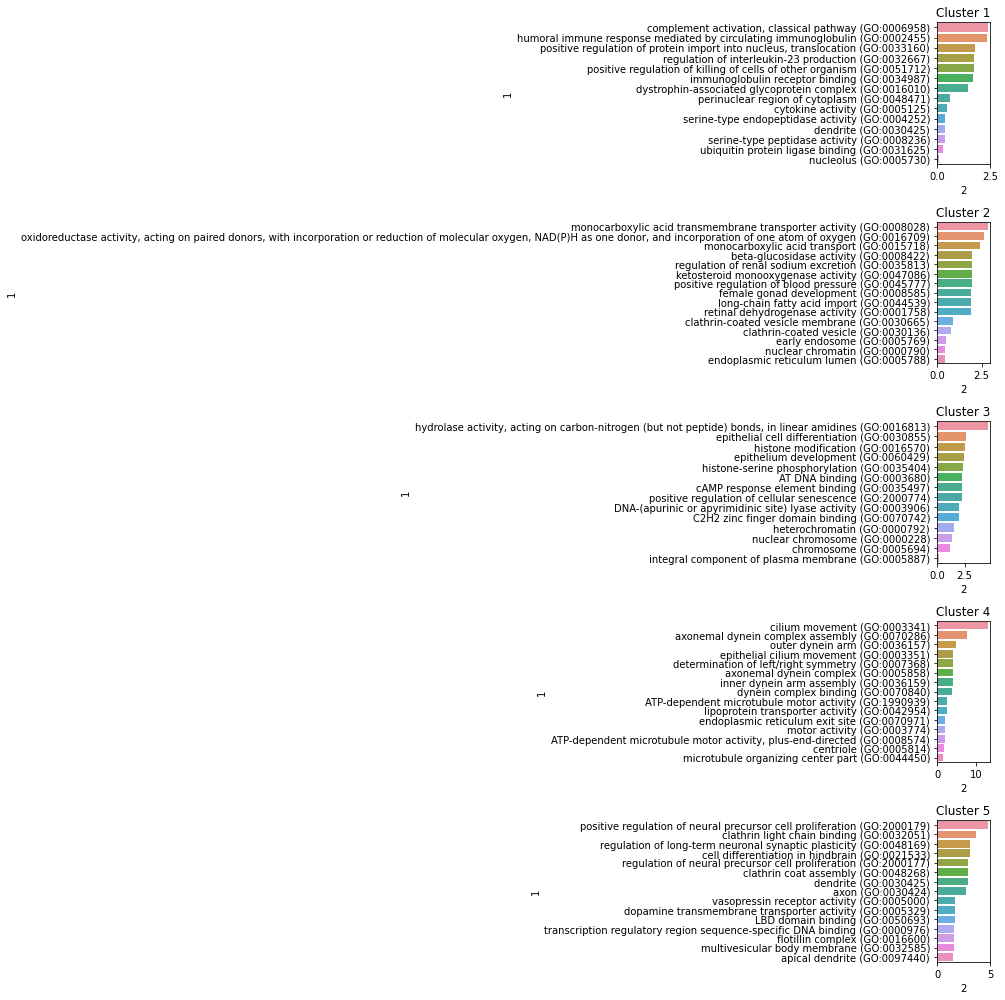

In [7]:
goDbs = ['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
test.enrichR(dbs = goDbs)
test.plotBar()

Survival analysis

## Visualing genes

In [ ]:
test.tSymbolDf = test.tSymbolDf.filter(items = bronchs, axis = 0)

In [ ]:
[x for x in test.symbolDf.index.tolist()]

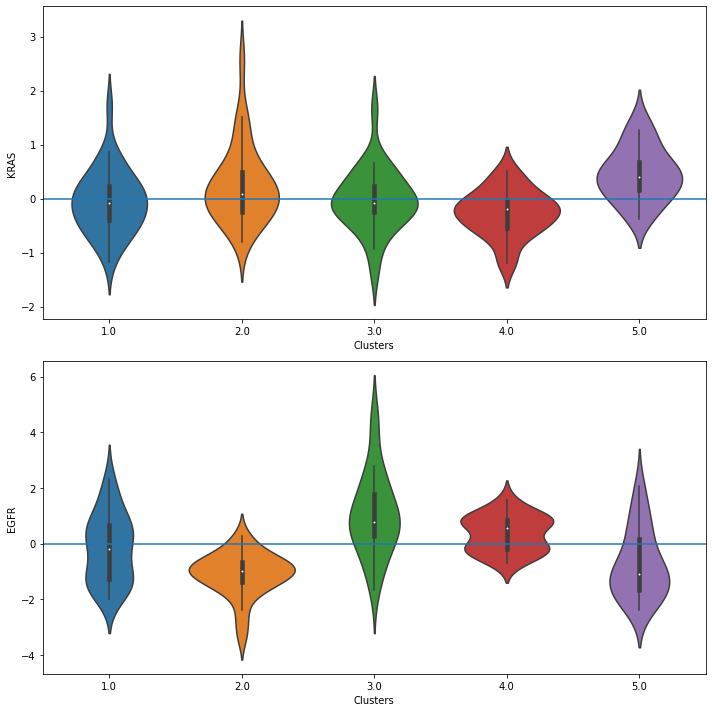

In [24]:
test.plotSingleGene(['KRAS', 'EGFR'])

In [ ]:
l = 'C1QA|C1QB|FCER1G|SERPING1|CD74'.split('|')

In [ ]:
import pandas as pd
df = pd.read_csv('data/ImmuneGenes.txt', sep = '\t')
im = df['ImmuneType'].unique().tolist()
li = list()
for i in im:
    li.append(df[df['ImmuneType']==i]['geneSymbol'].tolist())
output = ''
for counter, i in enumerate(im):
    output +=  i +'\t' + 'na\t'+'\t'.join(li[counter])
    
    output += '\n'
open('test.gmt', 'w').write(output)

In [ ]:
test.tSymbolDf = test.tSymbolDf.filter(items=bronchs, axis = 0)
test.tSymbolDf['Clusters'] = [1 if x != 4 else 2 for x in test.tSymbolDf['Clusters'].tolist()]

In [ ]:
import pandas as pd
df = pd.read_csv('data/ImmuneGenes.txt', sep = '\t')
l = [df[df['ImmuneType']==typ]['geneSymbol'].tolist() for typ in df['ImmuneType'].unique().tolist()]
L = [inner for outer in l for inner in outer]
L.append('Clusters')
df2 = pd.melt(test.tSymbolDf.filter(items = L), id_vars = ['Clusters'])
df = df.merge(df2, left_on = 'geneSymbol', right_on = 'variable')

In [ ]:
import seaborn as sns
sns.catplot(data = df, kind = 'box', x = 'Clusters', y = 'value', col = 'ImmuneType', col_wrap = 4, sharey = False)

In [ ]:
from scipy import stats
for typ in df['ImmuneType'].unique().tolist():
    temp = df[df['ImmuneType'] == typ]
    c1, c2 = temp[temp['Clusters'] == 1]['value'].tolist(), temp[temp['Clusters'] == 2]['value'].tolist()
    print(typ, stats.kruskal(c1,c2)[1])
    
# print(stats.kruskal(df[df['Clusters'] == 1]['value'].tolist(),df[df['Clusters'] == 2]['value'].tolist()) )

In [ ]:
test.plotMultipleGenes(l)

In [9]:
test.row_colors.unique()

array(['b', 'g', 'r', 'c', 'm'], dtype=object)

### TCGA data analysis

In [ ]:
import itertools
import pandas as pd
df = test.sigDf.filter(items = ['Signature.4'], axis = 'index')
newSorted = [['-'.join(x.split('-')[0:3]) for x in lista] for lista in test.sortedClusters]
newCluster =  list(itertools.chain.from_iterable([[counter+1 for x in lista] for counter, lista in enumerate(newSorted)]))
df = df.transpose()
df['Clusters'] = pd.Series(newCluster, index = itertools.chain.from_iterable(newSorted), name = 'Clusters')


In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'Clusters', y = 'Signature.4')

In [ ]:
from scipy import stats
kruskList = list()
for val in df['Clusters'].unique():
    kruskList.append(df[df['Clusters'] == val]['Signature.4'].to_numpy())
(stats.kruskal(*kruskList)[1])

In [ ]:
test.plotSignatures()

In [ ]:
test.corrDNA()

In [ ]:
test.boxplotExternalData(3)

In [ ]:
test.newDf['Clusters'] = [1 if x != 4 else 2 for x in test.newDf['Clusters'].tolist()]

In [ ]:
test.newDf

In [ ]:
test.newDf = test.newDf[test.newDf['variable'] != 'T.cells.CD4.naive']
test.newDf = test.newDf[test.newDf['variable'] != 'T.cells.CD4.memory.activated']
test.newDf = test.newDf[test.newDf['variable'] != 'T.cells.gamma.delta']
test.newDf = test.newDf[test.newDf['variable'] != 'Eosinophils']
test.newDf = test.newDf[test.newDf['variable'] != 'T.cells.CD4.naive']
test.newDf = test.newDf[test.newDf['variable'] != 'P.value']
test.newDf = test.newDf[test.newDf['variable'] != 'Correlation']
test.newDf = test.newDf[test.newDf['variable'] != 'RMSE']
test.newDf = test.newDf[test.newDf['variable'] != 'Coverage for 80% power']
test.newDf = test.newDf[test.newDf['variable'] != 'AS']
test.newDf = test.newDf[test.newDf['variable'] != 'NK.cells.resting']
test.newDf = test.newDf[test.newDf['variable'] != 'B.cells.memory']
test.newDf = test.newDf[test.newDf['variable'] != 'Macrophages.MO']
test.newDf = test.newDf[test.newDf['variable'] != 'Dendritic.cells.resting']
test.newDf = test.newDf[test.newDf['variable'] != 'Dendritic.cells.activated']
test.newDf = test.newDf[test.newDf['variable'] != 'Genome doublings']
test.newDf = test.newDf[test.newDf['variable'] != 'ploidy']
test.newDf = test.newDf[test.newDf['variable'] != 'Mast cells resting']
test.newDf = test.newDf[test.newDf['variable'] != 'Neutrohpils']
test.newDf = test.newDf[test.newDf['variable'] != 'neoantigen_num']
test.newDf = test.newDf[test.newDf['variable'] != 'indel_num']
test.newDf = test.newDf[test.newDf['variable'] != 'numberOfBindingExpressedPMHC']
test.newDf = test.newDf[test.newDf['variable'] != 'immunogenic_indel_num']
test.newDf = test.newDf[test.newDf['variable'] != 'Neutrophils']
test.newDf = test.newDf[test.newDf['variable'] != 'Monocytes']
test.newDf = test.newDf[test.newDf['variable'] != 'Mast.cells.activated']
test.newDf = test.newDf[test.newDf['variable'] != 'Cancer DNA fraction']
test.newDf = test.newDf[test.newDf['variable'] != 'purity']


In [ ]:
g = sns.catplot(data = test.newDf, kind = 'box', col = 'variable', y ='value', x = 'Clusters', col_wrap = 6, sharey = False)

# Export to R

In [ ]:
import pandas as pd
sList = list()
for sample in list(test.symbolDf):
    vals = list()
    for x in test.metaDf['Network cluster'].unique():
        genes = test.metaDf[test.metaDf['Network cluster'] == x]['Gene Symbol'].tolist()
        vals.append(test.symbolDf[sample].filter(items=genes).mean())
    s = pd.Series(data = vals, index = test.metaDf['Network cluster'].unique().tolist(), name = sample)
    sList.append(s)
metaExp = pd.concat(sList, axis = 1)
metaExp.to_csv('../R/Data/metaExpression.csv')

In [6]:
test.mapDf.to_csv('../R/Data/heatplot')

In [ ]:
test.col_colors.to_csv('../R/Data/col_colors')

In [7]:
test.row_colors.to_csv('../R/Data/row_colors')

In [ ]:
[len(x) for x in test.sortedClusters]

# Export to consensus

In [ ]:
import pandas as pd
df = pd.read_csv('data/test.csv')
df = df.set_index('Unnamed: 0')

In [ ]:

top = 1
bottom = 0.7
start = 0
df = df.iloc[:,start:].loc[(df.iloc[:,start:].var(axis = 1) < df.iloc[:,start:].var(axis = 1).quantile(top)) & (df.iloc[:,start:].var(axis = 1) > df.iloc[:,start:].var(axis = 1).quantile(bottom))]


In [ ]:
df.to_csv('../R/Data/filtered(0.85).csv')

# Export to GSEA

Starts writing the .cls file

In [ ]:
output =f'{len(test.samples)} {len(test.sortedClusters)} 1'
output += f'\n# {" ".join([str(i) for i in range(1, 1+len(test.sortedClusters))])}'
lista = [str(int(x)) for x in list(test.tDf['Clusters'])]

Run if you want to combine clusters together

In [ ]:
lista = ['1' if x != '4' else '2' for x in lista]

Writes the file

In [ ]:
output

In [ ]:
output += f'\n{" ".join(lista)}'
with open('data/gsea/data.cls', 'w') as file:
    file.write(output)

Fetches the symbol names to be used in gsea

In [ ]:
test.ensembl2symbol()
test.ensemble2gene()

Filters significant genes

In [ ]:
genLista = list(dict(test.genes['symbol'].dropna()).keys())
df = df[df['NAME'].isin(genLista)]
df = df.sort_values(by = 'NAME')
df['NAME'] = test.genes.sort_index()['symbol'].dropna().tolist()

In [ ]:
import numpy as np
# df = test.symbolDf.filter(items = allGenes, axis = 'index')
df = test.symbolDf
df.insert(0, 'NAME', value  = df.index.tolist())
df.insert(1, 'DESCRIPTION', [np.nan for x in range(len(df.index))])

In [ ]:
import itertools
allGenes =  (list(itertools.chain.from_iterable(test.eList)))

In [ ]:
df = df[df['NAME'].isin(allGenes)]

In [ ]:
df.to_csv('data/gsea/genes.txt', sep = '\t', index = False)

In [ ]:
import gseapy
data, gene_sets, cls = 'data/gsea/genes.txt', 'data/gsea/gmts/h.all.v7.2.symbols.gmt', 'data/gsea/data.cls'
gseapy.gsea(data=data, gene_sets=gene_sets, cls=cls, outdir='gsea_out')

## Removes the never smokers

In [ ]:
smokers = test.col_colors[test.col_colors['Never-smokers'] == 'silver'].index.tolist()
# smokers = [x+'-01A' for x in smokers]
test.df = test.df[smokers] 
test.col_colors = test.col_colors.filter(items = smokers, axis = 'index')
test.sortedClusters = [[x for x in lista if x in smokers] for lista in test.sortedClusters]
test.samples = smokers
test.samples = ['-'.join(x.split('-')[0:3]) for x in test.samples]